In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
import statsmodels.api as sts
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Code to ignore warnings
w.filterwarnings("ignore")


In [2]:
#Reading the data from the csv file
bike_Day_Details = pd.read_csv('day.csv')

#Copying the dataframe to another variable for further analysis 
main_df = bike_Day_Details

#Dropping unwanted columns and categorical columns to make dummy variables in the main dataframe
df = main_df.drop(columns=["instant","season","casual","registered","yr","mnth","holiday","weekday","workingday","weathersit","dteday"])


In [3]:
#Raw data information
bike_Day_Details.info()

#Raw data shape
bike_Day_Details.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


(730, 16)

In [4]:
#A descriptive statistical data for the raw data
bike_Day_Details.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Dropping the unwanted columns in the temperory dataframe
bike_Day_Details = bike_Day_Details.drop(columns=["instant","dteday","casual","registered"])


In [6]:
#Making a dataframe only with categorical variables to change the numeric values to string values
categorical_variables= ["season","yr","mnth", "holiday","weekday","workingday","weathersit" ]
df_categorical = bike_Day_Details.drop(columns=bike_Day_Details.columns.difference(categorical_variables))


In [7]:
#Changing all the categorical numeric values to string values from the data dictionary
seasons = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
years = {0: '2018', 1: '2019'}
months = {1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'}
holidays = {0:'Not a holiday', 1:'Holiday'}
weekdays = { 0: 'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',5: 'Friday',6: 'Saturday'}
workingdays= {0:'Holiday',1 : 'Working day'}
weathersituations = {1: 'Clear', 2: 'Misty', 3 : 'Light weather',4 :'Heavy weather'}
df_categorical['season'] = df_categorical['season'].replace(seasons)
df_categorical['yr'] = df_categorical['yr'].replace(years)
df_categorical['mnth'] = df_categorical['mnth'].replace(months)
df_categorical['holiday'] = df_categorical['holiday'].replace(holidays)
df_categorical['weekday'] = df_categorical['weekday'].replace(weekdays)
df_categorical['workingday'] = df_categorical['workingday'].replace(workingdays)
df_categorical['weathersit'] = df_categorical['weathersit'].replace(weathersituations)


In [8]:
#df shape
df.shape
#df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       730 non-null    float64
 1   atemp      730 non-null    float64
 2   hum        730 non-null    float64
 3   windspeed  730 non-null    float64
 4   cnt        730 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 28.6 KB


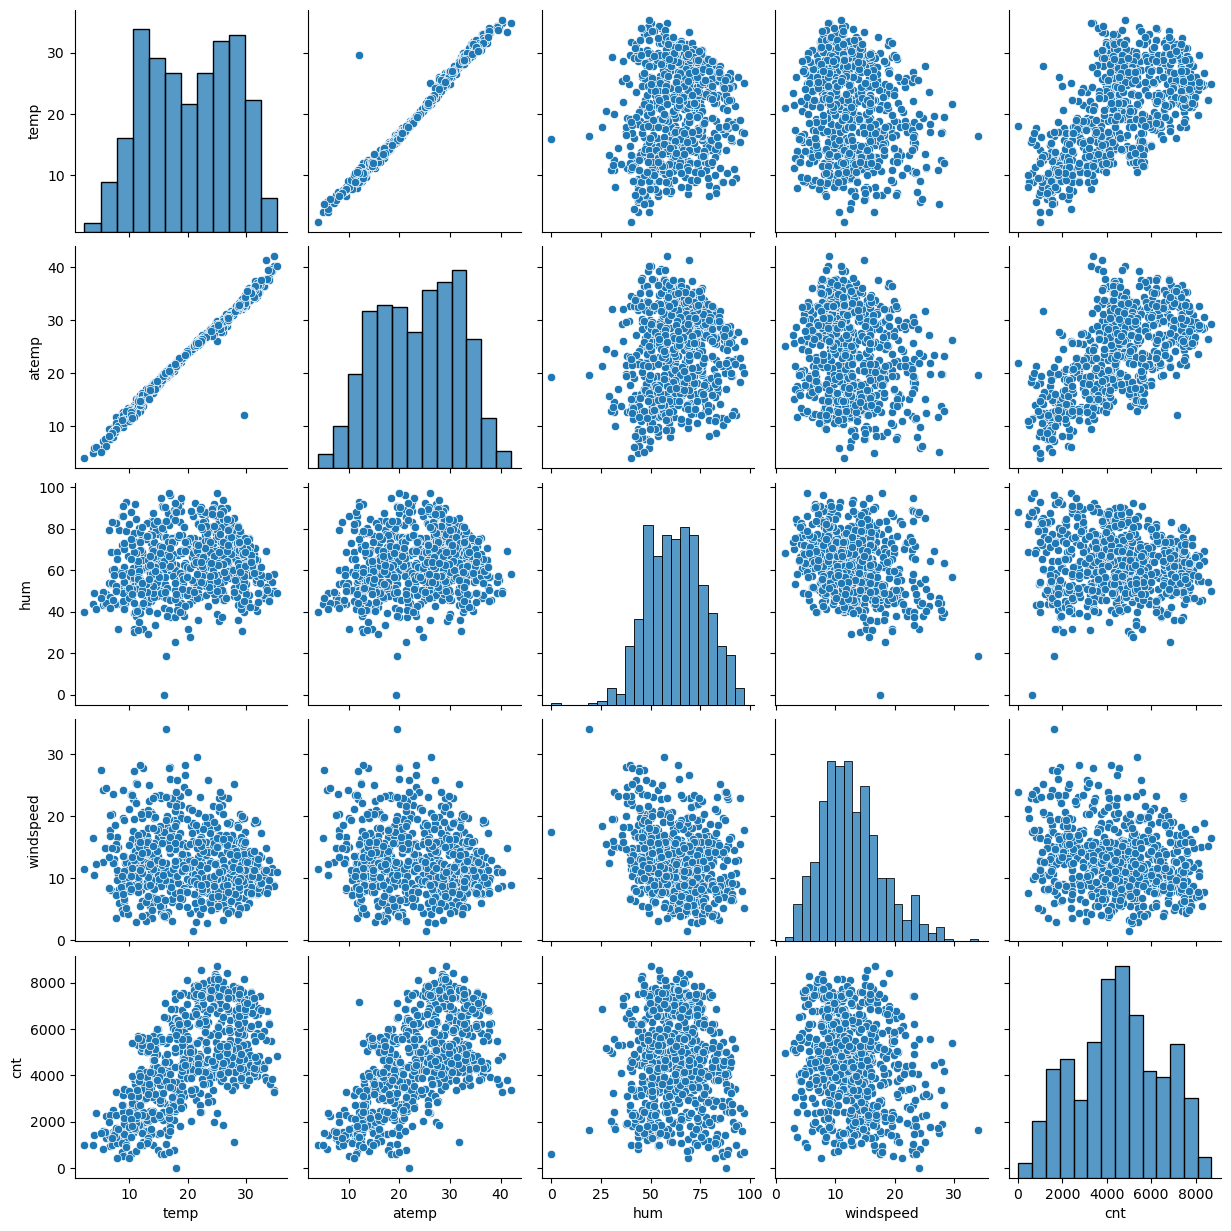

In [9]:
#Pair plot
sns.pairplot(df)
plt.show()

In [10]:
#This dataframe has the altered data which will be used to create the dataframe for further process
Altered_Bike_Details = pd.concat([df,df_categorical],axis=1)


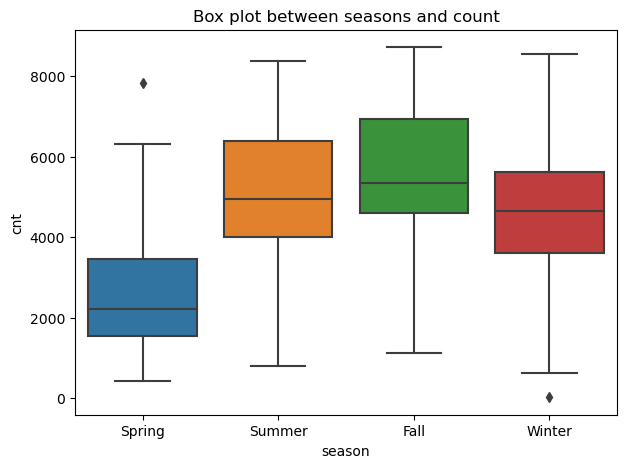

In [11]:
#Before applying dummy values to categorical variables, It makes sense to do box plots for the categorical variables
#Univariate Analysis
#Box plot between seasons and count
plt.figure(figsize=(7,5))
plt.title("Box plot between seasons and count")
sns.boxplot(x='season',y='cnt',data=Altered_Bike_Details)
plt.show()


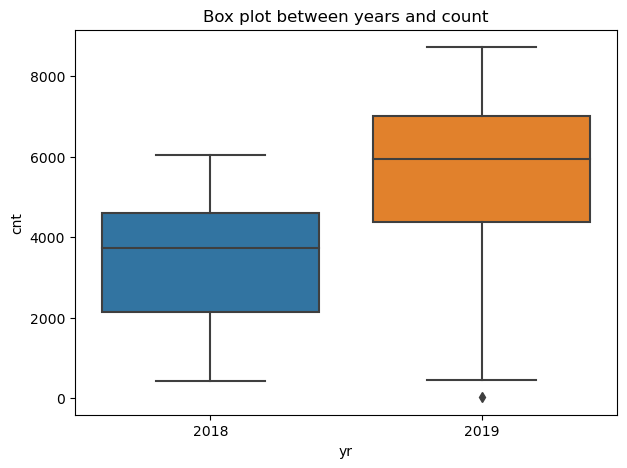

In [12]:
#Box plot between years and count
plt.figure(figsize=(7,5))
plt.title("Box plot between years and count")
sns.boxplot(x='yr',y='cnt',data=Altered_Bike_Details)
plt.show()

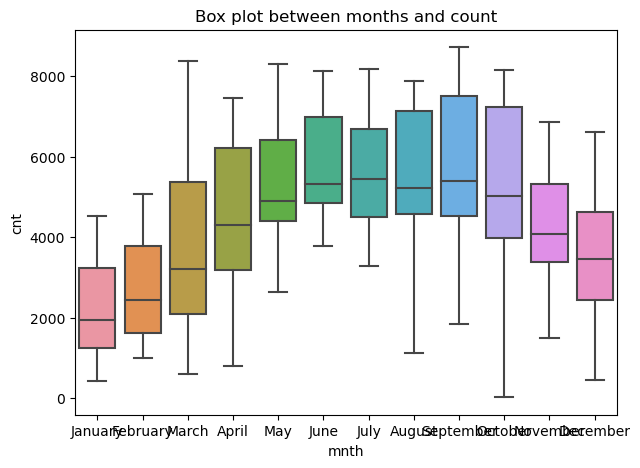

In [13]:
#Box plot between months and count
plt.figure(figsize=(7,5))
plt.title("Box plot between months and count")
sns.boxplot(x='mnth',y='cnt',data=Altered_Bike_Details)
plt.show()

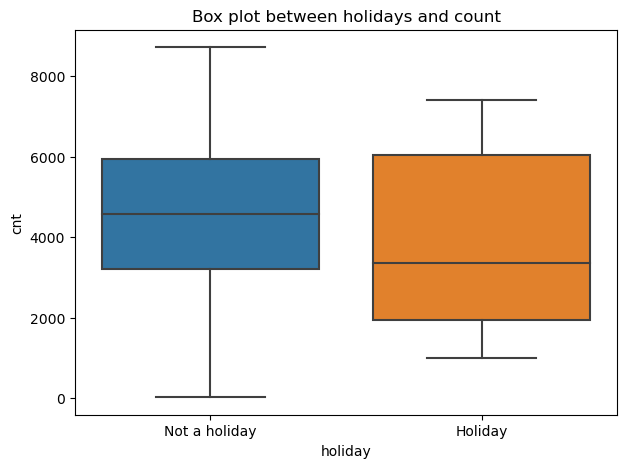

In [14]:
#Box plot between holidays and count
plt.figure(figsize=(7,5))
plt.title("Box plot between holidays and count")
sns.boxplot(x='holiday',y='cnt',data=Altered_Bike_Details)
plt.show()


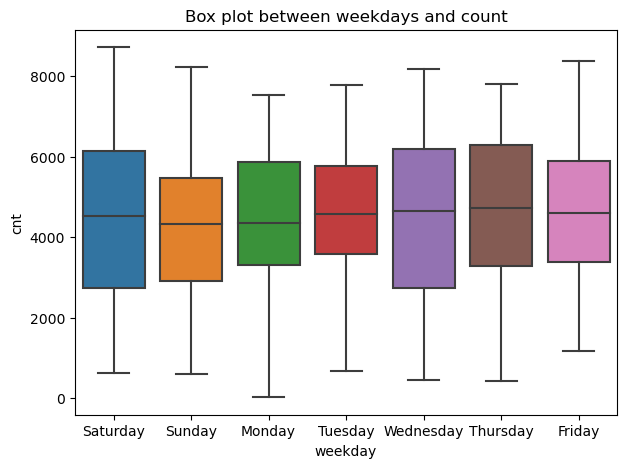

In [15]:
#Box plot between weekdays and count
plt.figure(figsize=(7,5))
plt.title("Box plot between weekdays and count")
sns.boxplot(x='weekday',y='cnt',data=Altered_Bike_Details)
plt.show()

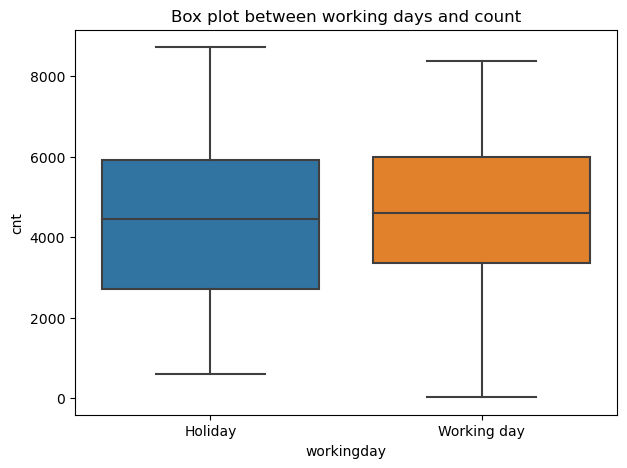

In [16]:
#Box plot between working days and count
plt.figure(figsize=(7,5))
plt.title("Box plot between working days and count")
sns.boxplot(x='workingday',y='cnt',data=Altered_Bike_Details)
plt.show()


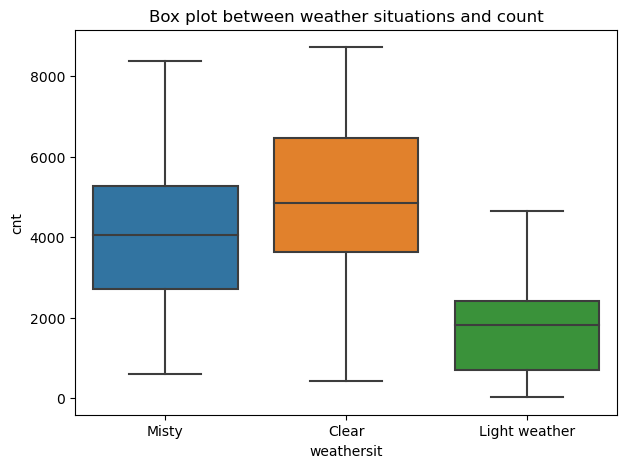

In [17]:
#Box plot between weather situations and count
plt.figure(figsize=(7,5))
plt.title("Box plot between weather situations and count")
sns.boxplot(x='weathersit',y='cnt',data=Altered_Bike_Details)
plt.show()

In [18]:
#Adding dummy values for all the categorical variables
dummy_df = pd.get_dummies(Altered_Bike_Details,columns=["season","yr","mnth", "holiday","weekday","workingday","weathersit"], drop_first=True)
Final_Bike_Details = dummy_df.replace({False :0,True:1})
#Sample data after adding dummy variables
Final_Bike_Details.head()


,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [19]:
#Data information after removing unwanted columns and adding dummy variables
Final_Bike_Details.info()

#Shape of the final dataframe
Final_Bike_Details.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      730 non-null    float64
 1   atemp                     730 non-null    float64
 2   hum                       730 non-null    float64
 3   windspeed                 730 non-null    float64
 4   cnt                       730 non-null    int64  
 5   season_Spring             730 non-null    int64  
 6   season_Summer             730 non-null    int64  
 7   season_Winter             730 non-null    int64  
 8   yr_2019                   730 non-null    int64  
 9   mnth_August               730 non-null    int64  
 10  mnth_December             730 non-null    int64  
 11  mnth_February             730 non-null    int64  
 12  mnth_January              730 non-null    int64  
 13  mnth_July                 730 non-null    int64  
 14  mnth_June 

(730, 30)

In [20]:
#A descriptive statistical data for the final dataframe
Final_Bike_Details.describe()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.500000,0.084932,...,0.971233,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.683562,0.028767,0.336986
std,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.500343,0.278971,...,0.167266,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.465405,0.167266,0.473004
min,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.500000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


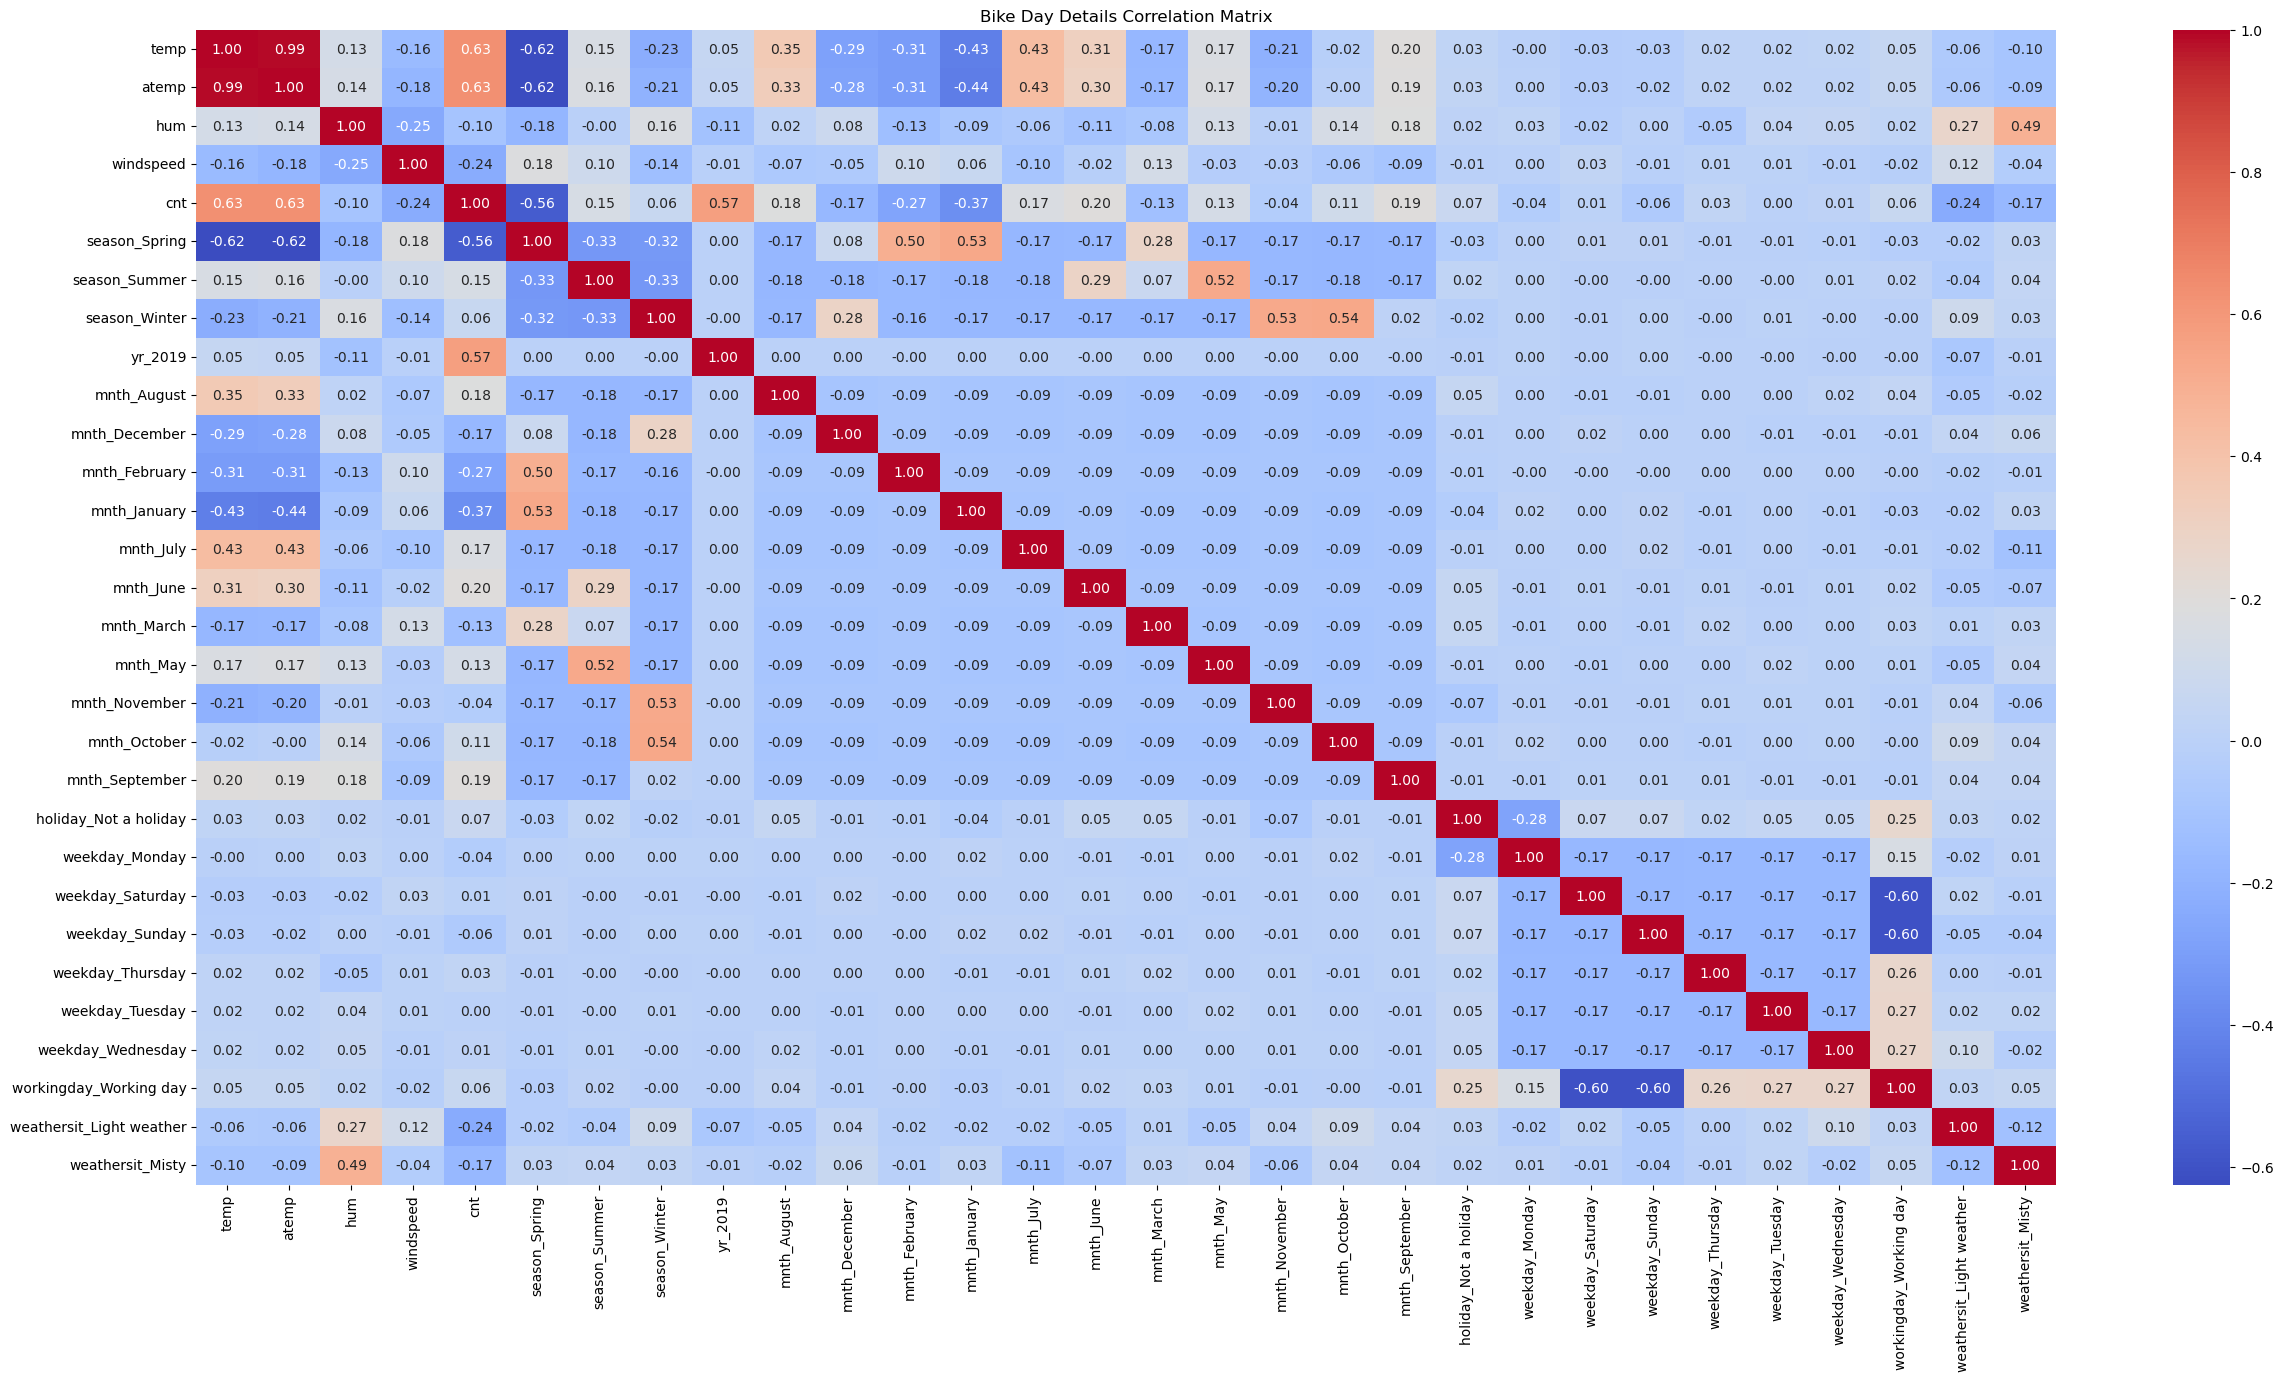

In [21]:
#Bivariate Analysis
#Correlation Heatmap for all the variables
plt.figure(figsize=(30, 15))  
Final_Bike_Details_Corr=Final_Bike_Details.corr()
sns.heatmap(Final_Bike_Details_Corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Bike Day Details Correlation Matrix')
plt.show()

In [22]:
#Model Creation
#Step-1 : Test and Train Split
#Using train_test_split from sklearn
df_train , df_test = train_test_split(Final_Bike_Details,train_size=0.7,test_size=0.3,random_state=100)
#Training Data Shape
print(df_train.shape)
#Test Data Shape
print(df_test.shape)

(510, 30)
(219, 30)


In [23]:
#Step-2 : Rescaling the features
#MinMax Scaling
#Creating an instance of MinMaxScaler
scaler = MinMaxScaler()
numeric_features = ['temp','atemp','hum','windspeed','cnt']
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
#Sample data after MinMaxScaling
df_train.head(10)

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
580,0.914852,0.882350,0.632030,0.462538,0.782559,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
500,0.719639,0.678508,0.719193,0.172431,0.851588,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
479,0.520271,0.513565,0.440962,0.164434,0.710308,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
472,0.503656,0.496135,0.586518,0.270032,0.499885,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,1


In [24]:
# Information of data after MinMaxScaling
df_train.info()
#Statistical information after MinMaxScaling
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      510 non-null    float64
 1   atemp                     510 non-null    float64
 2   hum                       510 non-null    float64
 3   windspeed                 510 non-null    float64
 4   cnt                       510 non-null    float64
 5   season_Spring             510 non-null    int64  
 6   season_Summer             510 non-null    int64  
 7   season_Winter             510 non-null    int64  
 8   yr_2019                   510 non-null    int64  
 9   mnth_August               510 non-null    int64  
 10  mnth_December             510 non-null    int64  
 11  mnth_February             510 non-null    int64  
 12  mnth_January              510 non-null    int64  
 13  mnth_July                 510 non-null    int64  
 14  mnth_June     

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,...,0.974510,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.676471,0.029412,0.343137
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,...,0.157763,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
#Step-3 : Seperating X_train and y_train from df_train
y_train = df_train.pop('cnt')
X_train=  df_train

In [26]:
#Sample X_train data
X_train.head()

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,mnth_December,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
653,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
576,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1


In [27]:
#Sample y_train data
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [28]:
#X_train information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      510 non-null    float64
 1   atemp                     510 non-null    float64
 2   hum                       510 non-null    float64
 3   windspeed                 510 non-null    float64
 4   season_Spring             510 non-null    int64  
 5   season_Summer             510 non-null    int64  
 6   season_Winter             510 non-null    int64  
 7   yr_2019                   510 non-null    int64  
 8   mnth_August               510 non-null    int64  
 9   mnth_December             510 non-null    int64  
 10  mnth_February             510 non-null    int64  
 11  mnth_January              510 non-null    int64  
 12  mnth_July                 510 non-null    int64  
 13  mnth_June                 510 non-null    int64  
 14  mnth_March    

In [29]:
#y_train information
y_train.info()

<class 'pandas.core.series.Series'>
Index: 510 entries, 653 to 79
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


In [30]:
#Adding constants to all the variables in the X_train because Statsmodels does not support constant addition automatically
#Bottom-up Approach
#Adding temp
X_train_sts = sts.add_constant(X_train['temp'])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           5.80e-61
Time:                        17:12:17   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Adding yr_2019
X_train_sts = sts.add_constant(X_train[['temp','yr_2019']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.25e-130
Time:                        17:12:17   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr_2019        0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Adding season_Spring
X_train_sts = sts.add_constant(X_train[['temp','yr_2019','season_Spring']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     475.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          8.50e-147
Time:                        17:12:17   Log-Likelihood:                 380.27
No. Observations:                 510   AIC:                            -752.5
Df Residuals:                     506   BIC:                            -735.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2025      0.019     10.795      0.000       0.166       0.239
temp              0.4167      0.029     14.570      0.000       0.361       0.473
yr_2019           0.2408      0.010     23.437      0.000       0.221       0.261
season_Spring    -0.1441      0.015     -9.627      0.000      -0.173      -0.115
==============================================================================
Omnibus:                      101.940   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.940
Skew:                          -0.976   Prob(JB):                     1.20e-60
Kurtosis:                       6.029   Cond. No.                         8.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Adding mnth_January
X_train_sts = sts.add_constant(X_train[['temp','yr_2019','season_Spring','mnth_January']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.08e-146
Time:                        17:12:17   Log-Likelihood:                 381.88
No. Observations:                 510   AIC:                            -753.8
Df Residuals:                     505   BIC:                            -732.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2077      0.019     10.966      0.000       0.171       0.245
temp              0.4077      0.029     14.069      0.000       0.351       0.465
yr_2019           0.2413      0.010     23.530      0.000       0.221       0.261
season_Spring    -0.1327      0.016     -8.186      0.000      -0.165      -0.101
mnth_January     -0.0391      0.022     -1.791      0.074      -0.082       0.004
==============================================================================
Omnibus:                      105.790   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.723
Skew:                          -1.006   Prob(JB):                     4.50e-64
Kurtosis:                       6.112   Cond. No.                         8.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#Adding windspeed
X_train_sts = sts.add_constant(X_train[['temp','yr_2019','season_Spring','mnth_January','windspeed']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     315.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.20e-152
Time:                        17:12:17   Log-Likelihood:                 400.18
No. Observations:                 510   AIC:                            -788.4
Df Residuals:                     504   BIC:                            -763.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2757      0.021     12.884      0.000       0.234       0.318
temp              0.3865      0.028     13.705      0.000       0.331       0.442
yr_2019           0.2426      0.010     24.485      0.000       0.223       0.262
season_Spring    -0.1201      0.016     -7.604      0.000      -0.151      -0.089
mnth_January     -0.0563      0.021     -2.651      0.008      -0.098      -0.015
windspeed        -0.1830      0.030     -6.123      0.000      -0.242      -0.124
==============================================================================
Omnibus:                       87.469   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.845
Skew:                          -0.885   Prob(JB):                     4.47e-46
Kurtosis:                       5.588   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Adding hum
X_train_sts = sts.add_constant(X_train[['temp','hum','yr_2019','season_Spring','mnth_January','windspeed']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     310.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.36e-165
Time:                        17:12:17   Log-Likelihood:                 433.45
No. Observations:                 510   AIC:                            -852.9
Df Residuals:                     503   BIC:                            -823.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4786      0.031     15.211      0.000       0.417       0.540
temp              0.3943      0.026     14.902      0.000       0.342       0.446
hum              -0.2801      0.033     -8.373      0.000      -0.346      -0.214
yr_2019           0.2348      0.009     25.151      0.000       0.216       0.253
season_Spring    -0.1348      0.015     -9.039      0.000      -0.164      -0.106
mnth_January     -0.0516      0.020     -2.587      0.010      -0.091      -0.012
windspeed        -0.2387      0.029     -8.284      0.000      -0.295      -0.182
==============================================================================
Omnibus:                       70.942   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.497
Skew:                          -0.745   Prob(JB):                     1.41e-35
Kurtosis:                       5.309   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Adding workingday_Working day
X_train_sts = sts.add_constant(X_train[['temp','hum','yr_2019','season_Spring','mnth_January','windspeed','workingday_Working day']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     267.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.49e-165
Time:                        17:12:17   Log-Likelihood:                 434.99
No. Observations:                 510   AIC:                            -854.0
Df Residuals:                     502   BIC:                            -820.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4687      0.032     14.689      0.000       0.406       0.531
temp                       0.3920      0.026     14.828      0.000       0.340       0.444
hum                       -0.2811      0.033     -8.420      0.000      -0.347      -0.216
yr_2019                    0.2344      0.009     25.147      0.000       0.216       0.253
season_Spring             -0.1350      0.015     -9.067      0.000      -0.164      -0.106
mnth_January              -0.0517      0.020     -2.599      0.010      -0.091      -0.013
windspeed                 -0.2373      0.029     -8.253      0.000      -0.294      -0.181
workingday_Working day     0.0172      0.010      1.744      0.082      -0.002       0.037
==============================================================================
Omnibus:                       66.924   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.523
Skew:                          -0.689   Prob(JB):                     2.29e-35
Kurtosis:                       5.368   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Adding atemp
X_train_sts = sts.add_constant(X_train[['temp','atemp','hum','yr_2019','season_Spring','mnth_January','windspeed','workingday_Working day']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     235.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.38e-164
Time:                        17:12:17   Log-Likelihood:                 436.39
No. Observations:                 510   AIC:                            -854.8
Df Residuals:                     501   BIC:                            -816.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4617      0.032     14.368      0.000       0.399       0.525
temp                       0.1575      0.144      1.095      0.274      -0.125       0.440
atemp                      0.2563      0.155      1.658      0.098      -0.047       0.560
hum                       -0.2841      0.033     -8.511      0.000      -0.350      -0.219
yr_2019                    0.2344      0.009     25.190      0.000       0.216       0.253
season_Spring             -0.1339      0.015     -9.004      0.000      -0.163      -0.105
mnth_January              -0.0496      0.020     -2.493      0.013      -0.089      -0.011
windspeed                 -0.2280      0.029     -7.791      0.000      -0.285      -0.170
workingday_Working day     0.0172      0.010      1.750      0.081      -0.002       0.037
==============================================================================
Omnibus:                       71.809   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.867
Skew:                          -0.729   Prob(JB):                     1.07e-38
Kurtosis:                       5.471   Cond. No.                         78.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Adding weekday_Sunday
X_train_sts = sts.add_constant(X_train[['temp','atemp','hum','yr_2019','season_Spring','mnth_January','windspeed','workingday_Working day','weekday_Sunday']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     211.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.91e-164
Time:                        17:12:17   Log-Likelihood:                 438.47
No. Observations:                 510   AIC:                            -856.9
Df Residuals:                     500   BIC:                            -814.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4747      0.033     14.529      0.000       0.411       0.539
temp                       0.1520      0.143      1.060      0.290      -0.130       0.434
atemp                      0.2628      0.154      1.705      0.089      -0.040       0.566
hum                       -0.2821      0.033     -8.474      0.000      -0.348      -0.217
yr_2019                    0.2348      0.009     25.309      0.000       0.217       0.253
season_Spring             -0.1338      0.015     -9.020      0.000      -0.163      -0.105
mnth_January              -0.0503      0.020     -2.535      0.012      -0.089      -0.011
windspeed                 -0.2290      0.029     -7.850      0.000      -0.286      -0.172
workingday_Working day     0.0026      0.012      0.214      0.831      -0.021       0.027
weekday_Sunday            -0.0329      0.016     -2.026      0.043      -0.065      -0.001
==============================================================================
Omnibus:                       76.242   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.327
Skew:                          -0.783   Prob(JB):                     1.15e-39
Kurtosis:                       5.447   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Adding season_Summer
X_train_sts = sts.add_constant(X_train[['temp','atemp','hum','yr_2019','season_Spring','season_Summer','mnth_January','windspeed','workingday_Working day','weekday_Sunday']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.19e-163
Time:                        17:12:17   Log-Likelihood:                 438.50
No. Observations:                 510   AIC:                            -855.0
Df Residuals:                     499   BIC:                            -808.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4755      0.033     14.448      0.000       0.411       0.540
temp                       0.1488      0.144      1.031      0.303      -0.135       0.433
atemp                      0.2659      0.155      1.716      0.087      -0.039       0.570
hum                       -0.2825      0.033     -8.466      0.000      -0.348      -0.217
yr_2019                    0.2348      0.009     25.285      0.000       0.217       0.253
season_Spring             -0.1348      0.016     -8.640      0.000      -0.165      -0.104
season_Summer             -0.0024      0.012     -0.208      0.836      -0.025       0.020
mnth_January              -0.0502      0.020     -2.530      0.012      -0.089      -0.011
windspeed                 -0.2279      0.030     -7.683      0.000      -0.286      -0.170
workingday_Working day     0.0027      0.012      0.223      0.824      -0.021       0.027
weekday_Sunday            -0.0329      0.016     -2.021      0.044      -0.065      -0.001
==============================================================================
Omnibus:                       76.702   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.224
Skew:                          -0.786   Prob(JB):                     4.44e-40
Kurtosis:                       5.461   Cond. No.                         80.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Adding season_Winter
X_train_sts = sts.add_constant(X_train[['temp','atemp','hum','yr_2019','season_Spring','season_Summer','season_Winter','mnth_January','windspeed','workingday_Working day','weekday_Sunday']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     182.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.09e-166
Time:                        17:12:18   Log-Likelihood:                 450.27
No. Observations:                 510   AIC:                            -876.5
Df Residuals:                     498   BIC:                            -825.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3706      0.039      9.558      0.000       0.294       0.447
temp                       0.4077      0.151      2.700      0.007       0.111       0.704
atemp                      0.1307      0.154      0.848      0.397      -0.172       0.433
hum                       -0.3094      0.033     -9.347      0.000      -0.374      -0.244
yr_2019                    0.2314      0.009     25.389      0.000       0.213       0.249
season_Spring             -0.0545      0.022     -2.424      0.016      -0.099      -0.010
season_Summer              0.0477      0.015      3.113      0.002       0.018       0.078
season_Winter              0.0910      0.019      4.852      0.000       0.054       0.128
mnth_January              -0.0331      0.020     -1.678      0.094      -0.072       0.006
windspeed                 -0.2356      0.029     -8.108      0.000      -0.293      -0.179
workingday_Working day     0.0043      0.012      0.359      0.720      -0.019       0.028
weekday_Sunday            -0.0334      0.016     -2.098      0.036      -0.065      -0.002
==============================================================================
Omnibus:                       94.652   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.148
Skew:                          -0.911   Prob(JB):                     6.49e-56
Kurtosis:                       5.939   Cond. No.                         83.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Adding weathersit_Misty
X_train_sts = sts.add_constant(X_train[['temp','atemp','hum','yr_2019','season_Spring','season_Summer','season_Winter','mnth_January','windspeed','workingday_Working day','weekday_Sunday','weathersit_Misty']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.77e-166
Time:                        17:12:18   Log-Likelihood:                 452.47
No. Observations:                 510   AIC:                            -878.9
Df Residuals:                     497   BIC:                            -823.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3585      0.039      9.174      0.000       0.282       0.435
temp                       0.3959      0.151      2.629      0.009       0.100       0.692
atemp                      0.1291      0.154      0.840      0.401      -0.173       0.431
hum                       -0.2677      0.039     -6.929      0.000      -0.344      -0.192
yr_2019                    0.2325      0.009     25.553      0.000       0.215       0.250
season_Spring             -0.0576      0.022     -2.564      0.011      -0.102      -0.013
season_Summer              0.0472      0.015      3.091      0.002       0.017       0.077
season_Winter              0.0867      0.019      4.612      0.000       0.050       0.124
mnth_January              -0.0325      0.020     -1.649      0.100      -0.071       0.006
windspeed                 -0.2308      0.029     -7.944      0.000      -0.288      -0.174
workingday_Working day     0.0043      0.012      0.357      0.721      -0.019       0.028
weekday_Sunday            -0.0351      0.016     -2.208      0.028      -0.066      -0.004
weathersit_Misty          -0.0231      0.011     -2.076      0.038      -0.045      -0.001
==============================================================================
Omnibus:                      102.336   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.355
Skew:                          -0.952   Prob(JB):                     6.01e-66
Kurtosis:                       6.242   Cond. No.                         85.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Adding weathersit_Light weather
X_train_sts = sts.add_constant(X_train[['temp','atemp','hum','yr_2019','season_Spring','season_Summer','season_Winter','mnth_January','windspeed','workingday_Working day','weekday_Sunday','weathersit_Misty','weathersit_Light weather']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.87e-181
Time:                        17:12:18   Log-Likelihood:                 490.78
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     496   BIC:                            -894.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3031      0.037      8.234      0.000       0.231       0.375
temp                         0.4356      0.140      3.114      0.002       0.161       0.711
atemp                        0.0426      0.143      0.298      0.766      -0.238       0.324
hum                         -0.1273      0.039     -3.251      0.001      -0.204      -0.050
yr_2019                      0.2319      0.008     27.443      0.000       0.215       0.248
season_Spring               -0.0704      0.021     -3.366      0.001      -0.112      -0.029
season_Summer                0.0389      0.014      2.737      0.006       0.011       0.067
season_Winter                0.0804      0.017      4.598      0.000       0.046       0.115
mnth_January                -0.0403      0.018     -2.204      0.028      -0.076      -0.004
windspeed                   -0.1867      0.027     -6.805      0.000      -0.241      -0.133
workingday_Working day       0.0043      0.011      0.392      0.695      -0.017       0.026
weekday_Sunday              -0.0424      0.015     -2.873      0.004      -0.071      -0.013
weathersit_Misty            -0.0554      0.011     -5.060      0.000      -0.077      -0.034
weathersit_Light weather    -0.2466      0.027     -8.966      0.000      -0.301      -0.193
==============================================================================
Omnibus:                       78.653   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.753
Skew:                          -0.734   Prob(JB):                     1.29e-50
Kurtosis:                       5.943   Cond. No.                         85.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#Calculating VIF values 
vif = pd.DataFrame()
vif['Features'] = X_train_sts.columns
vif['VIF'] = [variance_inflation_factor(X_train_sts.values, i) for i in range(X_train_sts.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,78.67
1,temp,57.84
2,atemp,53.41
5,season_Spring,4.67
7,season_Winter,3.32
6,season_Summer,2.17
3,hum,1.89
12,weathersit_Misty,1.57
8,mnth_January,1.56
10,workingday_Working day,1.56


In [44]:
#Removing high p values , low VIF
#Removing atemp
X_train_sts = sts.add_constant(X_train[['temp','hum','yr_2019','season_Spring','season_Summer','season_Winter','mnth_January','windspeed','workingday_Working day','weekday_Sunday','weathersit_Misty','weathersit_Light weather']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.35e-182
Time:                        17:12:18   Log-Likelihood:                 490.73
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     497   BIC:                            -900.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3029      0.037      8.237      0.000       0.231       0.375
temp                         0.4760      0.036     13.367      0.000       0.406       0.546
hum                         -0.1267      0.039     -3.244      0.001      -0.203      -0.050
yr_2019                      0.2319      0.008     27.467      0.000       0.215       0.248
season_Spring               -0.0697      0.021     -3.358      0.001      -0.110      -0.029
season_Summer                0.0397      0.014      2.845      0.005       0.012       0.067
season_Winter                0.0813      0.017      4.728      0.000       0.048       0.115
mnth_January                -0.0405      0.018     -2.217      0.027      -0.076      -0.005
windspeed                   -0.1883      0.027     -7.004      0.000      -0.241      -0.135
workingday_Working day       0.0044      0.011      0.396      0.692      -0.017       0.026
weekday_Sunday              -0.0424      0.015     -2.872      0.004      -0.071      -0.013
weathersit_Misty            -0.0555      0.011     -5.075      0.000      -0.077      -0.034
weathersit_Light weather    -0.2471      0.027     -9.015      0.000      -0.301      -0.193
==============================================================================
Omnibus:                       77.884   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.028
Skew:                          -0.726   Prob(JB):                     3.05e-50
Kurtosis:                       5.937   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Calculating VIF values after removing atemp
vif = pd.DataFrame()
vif['Features'] = X_train_sts.columns
vif['VIF'] = [variance_inflation_factor(X_train_sts.values, i) for i in range(X_train_sts.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,78.64
4,season_Spring,4.61
1,temp,3.75
6,season_Winter,3.21
5,season_Summer,2.09
2,hum,1.88
11,weathersit_Misty,1.57
7,mnth_January,1.56
9,workingday_Working day,1.56
10,weekday_Sunday,1.55


In [46]:
#Removing workingday_Working day
X_train_sts = sts.add_constant(X_train[['temp','hum','yr_2019','season_Spring','season_Summer','season_Winter','mnth_January','windspeed','weekday_Sunday','weathersit_Misty','weathersit_Light weather']])
#Creating the model using Statsmodels
MLR = sts.OLS(y_train,X_train_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.56e-184
Time:                        17:12:18   Log-Likelihood:                 490.65
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     498   BIC:                            -906.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3060      0.036      8.532      0.000       0.236       0.377
temp                         0.4762      0.036     13.385      0.000       0.406       0.546
hum                         -0.1262      0.039     -3.236      0.001      -0.203      -0.050
yr_2019                      0.2320      0.008     27.524      0.000       0.215       0.249
season_Spring               -0.0697      0.021     -3.362      0.001      -0.110      -0.029
season_Summer                0.0398      0.014      2.855      0.004       0.012       0.067
season_Winter                0.0811      0.017      4.724      0.000       0.047       0.115
mnth_January                -0.0406      0.018     -2.224      0.027      -0.076      -0.005
windspeed                   -0.1887      0.027     -7.031      0.000      -0.241      -0.136
weekday_Sunday              -0.0458      0.012     -3.851      0.000      -0.069      -0.022
weathersit_Misty            -0.0555      0.011     -5.080      0.000      -0.077      -0.034
weathersit_Light weather    -0.2471      0.027     -9.023      0.000      -0.301      -0.193
==============================================================================
Omnibus:                       79.970   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.230
Skew:                          -0.748   Prob(JB):                     3.73e-51
Kurtosis:                       5.948   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Calculating VIF values after removing workingday_Working day,atemp
vif = pd.DataFrame()
vif['Features'] = X_train_sts.columns
vif['VIF'] = [variance_inflation_factor(X_train_sts.values, i) for i in range(X_train_sts.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,74.96
4,season_Spring,4.61
1,temp,3.75
6,season_Winter,3.21
5,season_Summer,2.09
2,hum,1.88
10,weathersit_Misty,1.57
7,mnth_January,1.56
11,weathersit_Light weather,1.25
8,windspeed,1.21


In [48]:
#Step-4 : Residual Analysis
#Predicting the y values with the trained model
y_train_pred = MLR_model.predict(X_train_sts)
y_train_pred.head()

653    0.732552
576    0.784658
426    0.494505
728    0.351259
482    0.611445
dtype: float64

In [49]:
#R Squared Calculation on training dataset
r2_train = r2_score( y_true = y_train , y_pred = y_train_pred)
print(r2_train)

0.8301958066132288


<Axes: ylabel='Density'>

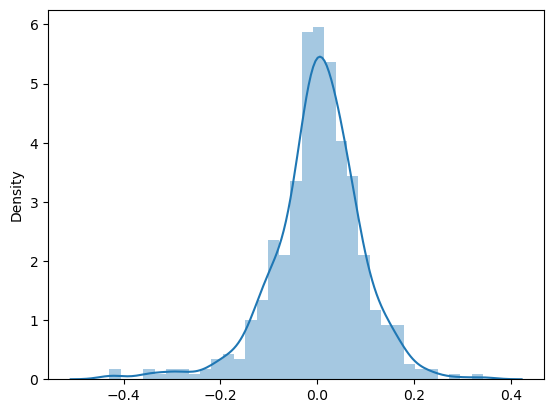

In [50]:
#Calculating Residuals
residuals = y_train-y_train_pred
#Histogram of residuals
sns.distplot(residuals)
#Residual follows a normal distribution and centered around zero

In [51]:
#Step-5 : Predicting the y values in the test dataset
#Transforming (Scaling) the test dataset
numeric_features = ['temp','atemp','hum','windspeed','cnt']
df_test[numeric_features] = scaler.transform(df_test[numeric_features])
df_test.head(10)

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
404,0.256524,0.240105,0.579218,0.326196,0.438104,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
198,0.856704,0.820207,0.671103,0.372990,0.510354,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
171,0.774672,0.733207,0.793903,0.276724,0.553728,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
512,0.814131,0.787883,0.696865,0.331536,0.692706,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
200,0.883701,0.876552,0.728638,0.153738,0.495858,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [52]:
#df_test information
df_test.info()
#df_test Shape
df_test.shape

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      219 non-null    float64
 1   atemp                     219 non-null    float64
 2   hum                       219 non-null    float64
 3   windspeed                 219 non-null    float64
 4   cnt                       219 non-null    float64
 5   season_Spring             219 non-null    int64  
 6   season_Summer             219 non-null    int64  
 7   season_Winter             219 non-null    int64  
 8   yr_2019                   219 non-null    int64  
 9   mnth_August               219 non-null    int64  
 10  mnth_December             219 non-null    int64  
 11  mnth_February             219 non-null    int64  
 12  mnth_January              219 non-null    int64  
 13  mnth_July                 219 non-null    int64  
 14  mnth_June     

(219, 30)

In [53]:
#df_test Statistical data
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,...,0.963470,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.698630,0.027397,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,...,0.188034,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.459904,0.163612,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#Seperating X_test and y_test from df_test
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
#Adding Constants
X_test_sts = sts.add_constant(X_test)
#variables in the model
model_variables= [ 'const','season_Spring','temp','season_Winter','season_Summer','hum','weathersit_Misty','mnth_January','weathersit_Light weather','windspeed','yr_2019','weekday_Sunday']
#Dropping variables according to the model developed
X_test_sts = X_test_sts.drop(columns=X_test_sts.columns.difference(model_variables))

In [56]:
X_test_sts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     219 non-null    float64
 1   temp                      219 non-null    float64
 2   hum                       219 non-null    float64
 3   windspeed                 219 non-null    float64
 4   season_Spring             219 non-null    int64  
 5   season_Summer             219 non-null    int64  
 6   season_Winter             219 non-null    int64  
 7   yr_2019                   219 non-null    int64  
 8   mnth_January              219 non-null    int64  
 9   weekday_Sunday            219 non-null    int64  
 10  weathersit_Light weather  219 non-null    int64  
 11  weathersit_Misty          219 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 22.2 KB


In [57]:
X_train_sts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     510 non-null    float64
 1   temp                      510 non-null    float64
 2   hum                       510 non-null    float64
 3   yr_2019                   510 non-null    int64  
 4   season_Spring             510 non-null    int64  
 5   season_Summer             510 non-null    int64  
 6   season_Winter             510 non-null    int64  
 7   mnth_January              510 non-null    int64  
 8   windspeed                 510 non-null    float64
 9   weekday_Sunday            510 non-null    int64  
 10  weathersit_Misty          510 non-null    int64  
 11  weathersit_Light weather  510 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 51.8 KB


In [58]:
#Predicting in the test dataset
y_test_pred = MLR_model.predict(X_test_sts)
y_test_pred.head()

184    0.391584
535    0.693049
299    0.355627
221    0.749460
152    0.819954
dtype: float64

In [59]:
#Evaluating the model
#Using R Squared on test dataset
r2_test = r2_score(y_true = y_test , y_pred = y_test_pred)
print(r2_test)

0.0031789811131521795


In [60]:
#The r2_score on the training dataset is 0.83 and the adjusted r2_score is 0.826 and for the test dataset is 0.0031
#The r2_score is almost zero for the test dataset which implies that the model poorly fits on the test data 
#The model is created using the manual feature selection by p values and VIF
#Let's check the r2_score after creating the model using RFE

In [61]:
#Model Creation using RFE , LinearRegression and statsmodels
#Step-1 : Test and Train Split
#Using train_test_split from sklearn
df_train_rfe , df_test_rfe = train_test_split(Final_Bike_Details,train_size=0.7,test_size=0.3,random_state=100)
#Training Data Shape
print(df_train_rfe.shape)
#Test Data Shape
print(df_test_rfe.shape)

(510, 30)
(219, 30)


In [62]:
#Step-2 : Scaling using MinMaxScaler
numeric_features = ['temp','atemp','hum','windspeed','cnt']
df_train_rfe[numeric_features] = scaler.fit_transform(df_train_rfe[numeric_features])
#Sample data after MinMaxScaling
df_train_rfe.head(10)

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
580,0.914852,0.882350,0.632030,0.462538,0.782559,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
500,0.719639,0.678508,0.719193,0.172431,0.851588,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
479,0.520271,0.513565,0.440962,0.164434,0.710308,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
472,0.503656,0.496135,0.586518,0.270032,0.499885,0,1,0,1,0,...,1,0,0,0,0,0,1,1,0,1


In [63]:
#Step-3 : Training the dataset
y_train_rfe = df_train_rfe.pop('cnt')
X_train_rfe = df_train_rfe
X_train_rfe.info()
X_train_rfe.shape

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      510 non-null    float64
 1   atemp                     510 non-null    float64
 2   hum                       510 non-null    float64
 3   windspeed                 510 non-null    float64
 4   season_Spring             510 non-null    int64  
 5   season_Summer             510 non-null    int64  
 6   season_Winter             510 non-null    int64  
 7   yr_2019                   510 non-null    int64  
 8   mnth_August               510 non-null    int64  
 9   mnth_December             510 non-null    int64  
 10  mnth_February             510 non-null    int64  
 11  mnth_January              510 non-null    int64  
 12  mnth_July                 510 non-null    int64  
 13  mnth_June                 510 non-null    int64  
 14  mnth_March    

(510, 29)

In [64]:
#Fitting the model
LR = LinearRegression()
rfe = RFE(estimator=LR, n_features_to_select=10)
rfe = rfe.fit(X_train_rfe, y_train_rfe)

In [65]:
#Checking the RFE Ranking
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_August', False, 12),
 ('mnth_December', False, 8),
 ('mnth_February', False, 9),
 ('mnth_January', False, 6),
 ('mnth_July', True, 1),
 ('mnth_June', False, 19),
 ('mnth_March', False, 20),
 ('mnth_May', False, 11),
 ('mnth_November', False, 7),
 ('mnth_October', False, 18),
 ('mnth_September', True, 1),
 ('holiday_Not a holiday', True, 1),
 ('weekday_Monday', False, 14),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 13),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 15),
 ('weekday_Wednesday', False, 17),
 ('workingday_Working day', False, 5),
 ('weathersit_Light weather', True, 1),
 ('weathersit_Misty', False, 2)]

In [66]:
#Columns that RFE supports
supported_columns = X_train_rfe.columns[rfe.support_]
print(supported_columns)

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'yr_2019',
       'mnth_July', 'mnth_September', 'holiday_Not a holiday',
       'weathersit_Light weather'],
      dtype='object')


In [67]:
#Selecting the supported columns
X_train_rfe_supported  = X_train_rfe[supported_columns]
X_train_rfe_supported.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      510 non-null    float64
 1   hum                       510 non-null    float64
 2   windspeed                 510 non-null    float64
 3   season_Spring             510 non-null    int64  
 4   season_Winter             510 non-null    int64  
 5   yr_2019                   510 non-null    int64  
 6   mnth_July                 510 non-null    int64  
 7   mnth_September            510 non-null    int64  
 8   holiday_Not a holiday     510 non-null    int64  
 9   weathersit_Light weather  510 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 43.8 KB


In [68]:
#Adding the constants using statsmodels
X_train_rfe_supported_sts = sts.add_constant(X_train_rfe_supported)
X_train_rfe_supported_sts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     510 non-null    float64
 1   temp                      510 non-null    float64
 2   hum                       510 non-null    float64
 3   windspeed                 510 non-null    float64
 4   season_Spring             510 non-null    int64  
 5   season_Winter             510 non-null    int64  
 6   yr_2019                   510 non-null    int64  
 7   mnth_July                 510 non-null    int64  
 8   mnth_September            510 non-null    int64  
 9   holiday_Not a holiday     510 non-null    int64  
 10  weathersit_Light weather  510 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 47.8 KB


In [69]:
#Creating the model using Statsmodels
MLR = sts.OLS(y_train_rfe,X_train_rfe_supported_sts)
#Fitting the model
MLR_model = MLR.fit()
#Statistical summary of the model
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.53e-184
Time:                        17:12:18   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2849      0.040      7.056      0.000       0.206       0.364
temp                         0.5147      0.031     16.542      0.000       0.454       0.576
hum                         -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed                   -0.1887      0.026     -7.194      0.000      -0.240      -0.137
season_Spring               -0.1005      0.015     -6.536      0.000      -0.131      -0.070
season_Winter                0.0653      0.013      5.153      0.000       0.040       0.090
yr_2019                      0.2281      0.008     27.102      0.000       0.212       0.245
mnth_July                   -0.0805      0.018     -4.538      0.000      -0.115      -0.046
mnth_September               0.0598      0.016      3.723      0.000       0.028       0.091
holiday_Not a holiday        0.0920      0.026      3.472      0.001       0.040       0.144
weathersit_Light weather    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#Calculating VIF values 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_supported_sts.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_supported_sts.values, i) for i in range(X_train_rfe_supported_sts.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,94.85
1,temp,2.87
4,season_Spring,2.53
5,season_Winter,1.75
7,mnth_July,1.29
2,hum,1.26
3,windspeed,1.15
8,mnth_September,1.11
10,weathersit_Light weather,1.11
6,yr_2019,1.03


In [71]:
#Step-4 : Residual Analysis
#Predicting the y values with the trained model
y_train_rfe_pred = MLR_model.predict(X_train_rfe_supported_sts)
y_train_rfe_pred.head()

653    0.718991
576    0.696097
426    0.509330
728    0.369626
482    0.635442
dtype: float64

In [72]:
#R Squared Calculation on training dataset
r2_train_rfe = r2_score( y_true = y_train_rfe , y_pred = y_train_rfe_pred)
print(r2_train_rfe)

0.8295534066833782


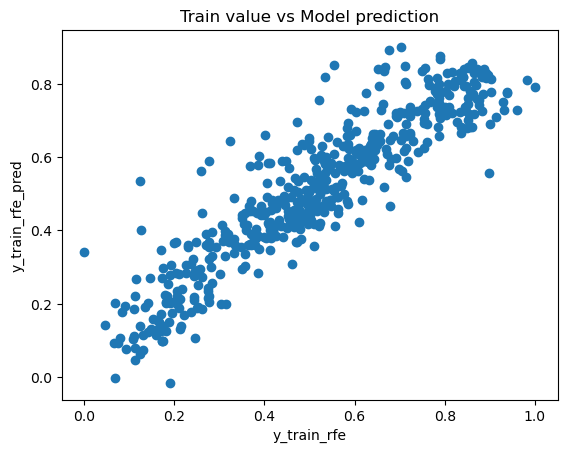

In [85]:
#This scatter plot shows the relationship between y_test_rfe and y_test_rfe_pred
plt.scatter(y_train_rfe,y_train_rfe_pred)
plt.title("Train value vs Model prediction")
plt.xlabel('y_train_rfe')
plt.ylabel('y_train_rfe_pred')
plt.show()

<Axes: ylabel='Density'>

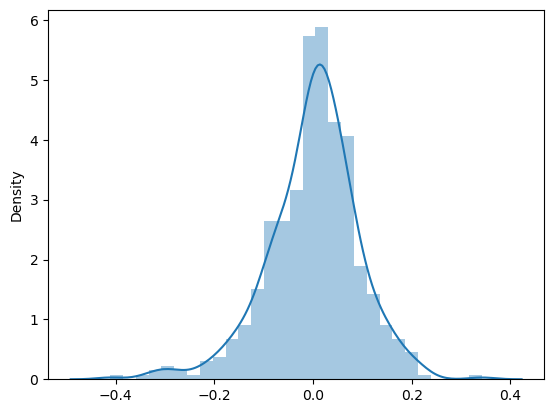

In [73]:
#Calculating Residuals
residuals_rfe = y_train_rfe-y_train_rfe_pred
#Histogram of residuals
sns.distplot(residuals_rfe)
#Residual follows a normal distribution and centered around zero

In [74]:
#Step-5 : Predicting the y values in the test dataset
#Transforming (Scaling) the test dataset
numeric_features = ['temp','atemp','hum','windspeed','cnt']
df_test_rfe[numeric_features] = scaler.transform(df_test_rfe[numeric_features])
df_test.head(10)

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,mnth_December,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
184,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,0,1,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
299,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
221,0.881625,0.795343,0.437098,0.339570,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
152,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
404,0.256524,0.240105,0.579218,0.326196,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
198,0.856704,0.820207,0.671103,0.372990,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
171,0.774672,0.733207,0.793903,0.276724,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
512,0.814131,0.787883,0.696865,0.331536,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
200,0.883701,0.876552,0.728638,0.153738,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [75]:
#df_test information
df_test_rfe.info()
#df_test Shape
df_test_rfe.shape

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      219 non-null    float64
 1   atemp                     219 non-null    float64
 2   hum                       219 non-null    float64
 3   windspeed                 219 non-null    float64
 4   cnt                       219 non-null    float64
 5   season_Spring             219 non-null    int64  
 6   season_Summer             219 non-null    int64  
 7   season_Winter             219 non-null    int64  
 8   yr_2019                   219 non-null    int64  
 9   mnth_August               219 non-null    int64  
 10  mnth_December             219 non-null    int64  
 11  mnth_February             219 non-null    int64  
 12  mnth_January              219 non-null    int64  
 13  mnth_July                 219 non-null    int64  
 14  mnth_June     

(219, 30)

In [76]:
#df_test_rfe Statistical data
df_test_rfe.describe()

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_August,...,holiday_Not a holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Working day,weathersit_Light weather,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,...,0.963470,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.698630,0.027397,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,...,0.188034,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.459904,0.163612,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
#Seperating X_test_rfe and y_test_rfe from df_test_rfe
y_test_rfe = df_test_rfe.pop('cnt')
X_test_rfe = df_test_rfe

In [78]:
#Adding Constants
X_test_rfe_sts = sts.add_constant(X_test_rfe)
#variables in the model
model_variables= [ 'const','temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'yr_2019',
       'mnth_July', 'mnth_September', 'holiday_Not a holiday',
       'weathersit_Light weather']
#Dropping variables according to the model developed
X_test_rfe_sts = X_test_rfe_sts.drop(columns=X_test_rfe_sts.columns.difference(model_variables))

In [79]:
#X_test_rfe_sts information
X_test_rfe_sts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     219 non-null    float64
 1   temp                      219 non-null    float64
 2   hum                       219 non-null    float64
 3   windspeed                 219 non-null    float64
 4   season_Spring             219 non-null    int64  
 5   season_Winter             219 non-null    int64  
 6   yr_2019                   219 non-null    int64  
 7   mnth_July                 219 non-null    int64  
 8   mnth_September            219 non-null    int64  
 9   holiday_Not a holiday     219 non-null    int64  
 10  weathersit_Light weather  219 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 20.5 KB


In [80]:
X_train_rfe_supported_sts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     510 non-null    float64
 1   temp                      510 non-null    float64
 2   hum                       510 non-null    float64
 3   windspeed                 510 non-null    float64
 4   season_Spring             510 non-null    int64  
 5   season_Winter             510 non-null    int64  
 6   yr_2019                   510 non-null    int64  
 7   mnth_July                 510 non-null    int64  
 8   mnth_September            510 non-null    int64  
 9   holiday_Not a holiday     510 non-null    int64  
 10  weathersit_Light weather  510 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 47.8 KB


In [81]:
#Predicting in the test dataset
y_test_rfe_pred = MLR_model.predict(X_test_rfe_sts)
y_test_rfe_pred.head()

184    0.437271
535    0.873447
299    0.414136
221    0.647384
152    0.610422
dtype: float64

In [82]:
#Evaluating the model
#Using R Squared on test dataset
r2_test_rfe = r2_score(y_true = y_test_rfe , y_pred = y_test_rfe_pred)
print(r2_test_rfe)

0.8177513196533348


In [83]:
#As we can see the r2_score on the training dataset is 0.83 and for the test dataset is 0.83 and the adjusted r2_score is 0.826 while using RFE
#Manual feature selection may lead to less r2_score in the test dataset eventhough the r2_score in the training dataset is 0.83

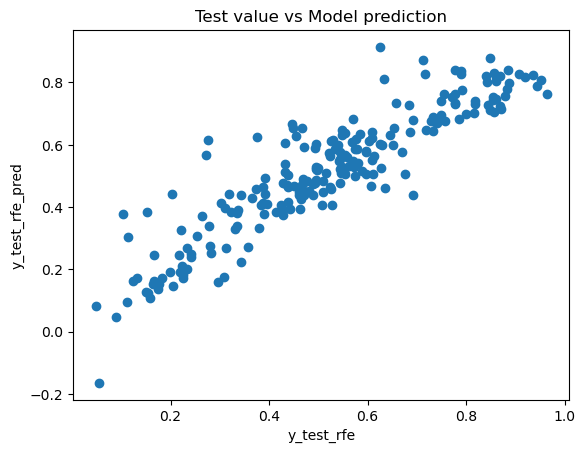

In [84]:
#This scatter plot shows the relationship between y_test_rfe and y_test_rfe_pred
plt.scatter(y_test_rfe,y_test_rfe_pred)
plt.title("Test value vs Model prediction")
plt.xlabel('y_test_rfe')
plt.ylabel('y_test_rfe_pred')
plt.show()